# Tehtävä 1.
## Aihe: Uutisotsikon klassifiointi - Clickbait vai ei?
2,5 pistettä

Datasetin kuvaus GitHubissa:
https://github.com/bhargaviparanjape/clickbait/tree/master/dataset

1. Lataa clickbait ja ei-clickbait otsikot clickbait_data.txt ja non_clickbait_data.txt tiedostoista data - kansiosta
2. Leimaa otsikot 0 tai 1 luokkaan (clickbait vai ei)
2. Jaa data koulutus- ja testidataan (80% koulutusdataa 20% testidataa jako)
4. Luo RNN - malli, joka ennustaa, onko otsikko clickbait vai ei
5. Tulosta mallin tarkkuus evaluate - funktiolla
6. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Käytä materiaaleista tuttua Tokenizer - luokkaa
* Luo otsikoista samanpituiset sekvenssit

In [1]:
# Tehtävän toteutus

### Lataa clickbait ja ei-clickbait otsikot clickbait_data.txt ja non_clickbait_data.txt tiedostoista data - kansiosta

In [17]:
import pandas as pd
import tensorflow as tf

In [2]:
df_clickbait = pd.read_csv('data/clickbait_data.txt', sep="\t", header=None)
df_non_clickbait=pd.read_csv('data/non_clickbait_data.txt', sep="\t", header=None)

In [3]:
df_clickbait.head()

,0
0,Should I Get Bings
1,Which TV Female Friend Group Do You Belong In
2,"The New ""Star Wars: The Force Awakens"" Trailer..."
3,"This Vine Of New York On ""Celebrity Big Brothe..."
4,A Couple Did A Stunning Photo Shoot With Their...


In [4]:
df_non_clickbait.head()

,0
0,Bill Changing Credit Card Rules Is Sent to Oba...
1,"In Hollywood, the Easy-Money Generation Toughe..."
2,1700 runners still unaccounted for in UK's Lak...
3,Yankees Pitchers Trade Fielding Drills for Put...
4,Large earthquake rattles Indonesia; Seventh in...


In [5]:
df_clickbait.shape

(15999, 1)

In [6]:
df_non_clickbait.shape

(16001, 1)

### Leimaa otsikot 0 tai 1 luokkaan (clickbait vai ei)

In [7]:
df_clickbait["label"] = 1
df_clickbait.head()

,0,label
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [8]:
df_non_clickbait["label"] = 0
df_non_clickbait.head()

,0,label
0,Bill Changing Credit Card Rules Is Sent to Oba...,0
1,"In Hollywood, the Easy-Money Generation Toughe...",0
2,1700 runners still unaccounted for in UK's Lak...,0
3,Yankees Pitchers Trade Fielding Drills for Put...,0
4,Large earthquake rattles Indonesia; Seventh in...,0


In [9]:
df_non_clickbait.tail()

,0,label
15996,"To Make Female Hearts Flutter in Iraq, Throw a...",0
15997,"British Liberal Democrat Patsy Calton, 56, die...",0
15998,Drone smartphone app to help heart attack vict...,0
15999,"Netanyahu Urges Pope Benedict, in Israel, to D...",0
16000,Computer Makers Prepare to Stake Bigger Claim ...,0


In [10]:
df = pd.concat([df_clickbait, df_non_clickbait.rename(columns={'Otsikko':'Class'})], ignore_index=False)

In [11]:
df.head()

,0,label
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [12]:
df.tail()

,0,label
15996,"To Make Female Hearts Flutter in Iraq, Throw a...",0
15997,"British Liberal Democrat Patsy Calton, 56, die...",0
15998,Drone smartphone app to help heart attack vict...,0
15999,"Netanyahu Urges Pope Benedict, in Israel, to D...",0
16000,Computer Makers Prepare to Stake Bigger Claim ...,0


In [13]:
df.shape

(32000, 2)

### Jaa data koulutus- ja testidataan (80% koulutusdataa 20% testidataa jako)

In [14]:
from sklearn.model_selection import train_test_split
y=df.pop('label')
X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Luo RNN - malli, joka ennustaa, onko otsikko clickbait vai ei

In [18]:
# Tokenizer luonti. Parametriin 'num_words' määritellään sanakirjan koko.
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=120)
# Sanakirjan luonti
tokenizer.fit_on_texts(X_train[0].tolist())

# Tekstit sekvensseiksi
text_train_seq = tokenizer.texts_to_sequences(X_train[0].tolist())
text_test_seq = tokenizer.texts_to_sequences(X_test[0].tolist())
text_train_seq

[[1, 40, 81, 32, 16],
 [81, 32, 2],
 [4, 3, 64, 2, 13, 18, 79, 5, 7],
 [1, 79, 5],
 [49],
 [3, 37, 58, 4, 62],
 [82, 13, 18, 35, 45],
 [77, 4],
 [33, 76, 2],
 [102, 11, 3],
 [49, 2],
 [25, 1, 11, 5],
 [13, 18, 35, 5, 15],
 [8],
 [78, 13, 45, 1, 3, 18, 95],
 [1, 2],
 [31, 90, 48, 11, 92, 1],
 [24, 32, 2],
 [87, 33, 2],
 [53, 5, 101, 17],
 [22, 55],
 [5, 11],
 [76, 2],
 [15],
 [93, 60, 5, 8, 3],
 [12, 49],
 [73, 33, 15],
 [2],
 [103, 1, 2],
 [3, 4, 18, 5, 7, 65],
 [119, 17, 6],
 [111, 10, 18],
 [17],
 [15],
 [36, 23, 13, 38, 113],
 [67, 10, 90, 21, 5],
 [12, 1, 2, 53, 87],
 [9, 52, 4, 2],
 [],
 [4, 49, 15, 3],
 [2, 19, 1, 2],
 [21],
 [3, 77, 15, 27, 6],
 [74, 6, 55],
 [57, 6, 2, 9, 51, 57],
 [103, 1, 8],
 [1, 19],
 [28, 1, 9, 109, 65],
 [49, 2],
 [8],
 [67, 25, 1, 35, 3, 58, 85],
 [25, 4, 42, 30, 5],
 [87, 24, 7, 4],
 [64, 34, 6, 115],
 [11, 51, 9, 7],
 [28, 68, 1, 21],
 [19],
 [1, 7],
 [3, 19, 3, 12, 1, 5],
 [27, 4],
 [2, 21, 6, 74],
 [4, 2, 19],
 [2, 3, 4, 6, 3, 4],
 [1, 54],
 [1, 34, 

In [19]:
# Täytetään one-hot enkoodatut lauseet samanpituisiksi
padded_one_hot_sentences_train = tf.keras.preprocessing.sequence.pad_sequences(text_train_seq, maxlen=4, padding='post')
padded_one_hot_sentences_test = tf.keras.preprocessing.sequence.pad_sequences(text_test_seq, maxlen=4, padding='post')

padded_one_hot_sentences_train

array([[ 40,  81,  32,  16],
       [ 81,  32,   2,   0],
       [ 18,  79,   5,   7],
       ...,
       [117,   0,   0,   0],
       [  3,  58,   9,  85],
       [ 12,   8, 114,   0]])

In [20]:
len(padded_one_hot_sentences_train[0])

4

In [21]:
input_layer = tf.keras.Input(shape=(4,))
emb = tf.keras.layers.Embedding(20000,2,
                                input_length=len(padded_one_hot_sentences_train[0]))(input_layer)
lstm = tf.keras.layers.LSTM(64,return_sequences=True,dropout=0.1)(emb)
do = tf.keras.layers.Dropout(0.5)(lstm)
flat = tf.keras.layers.Flatten()(do)
dense = tf.keras.layers.Dense(32,activation='relu')(flat)
out = tf.keras.layers.Dense(1,activation='sigmoid')(dense)
model = tf.keras.Model(inputs=input_layer,
                    outputs=out)

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
model.fit(padded_one_hot_sentences_train,
          y_train,
          validation_data=(padded_one_hot_sentences_test,y_test),
          epochs=10)

C:\Users\Rixu\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
800/800 [==============================] - 7s 6ms/step - loss: 0.5130 - accuracy: 0.7977 - val_loss: 0.3243 - val_accuracy: 0.8719
Epoch 2/10
800/800 [==============================] - 4s 5ms/step - loss: 0.3134 - accuracy: 0.8775 - val_loss: 0.2907 - val_accuracy: 0.8850
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 0.2908 - accuracy: 0.8859 - val_loss: 0.2757 - val_accuracy: 0.8903
Epoch 4/10
800/800 [==============================] - 3s 3ms/step - loss: 0.2786 - accuracy: 0.8891 - val_loss: 0.2682 - val_accuracy: 0.8931
Epoch 5/10
800/800 [==============================] - 3s 3ms/step - loss: 0.2719 - accuracy: 0.8913 - val_loss: 0.2621 - val_accuracy: 0.8977
Epoch 6/10
800/800 [==============================] - 3s 4ms/step - loss: 0.2671 - accuracy: 0.8932 - val_loss: 0.2572 - val_accuracy: 0.8997
Epoch 7/10
800/800 [==============================] - 3s 4ms/step - loss: 0.2635 - accuracy: 0.8959 - val_loss: 0.2566 - val_accuracy: 0.8984
Epoch 

In [23]:
padded_one_hot_sentences_test.shape

(6400, 4)

### Tulosta mallin tarkkuus evaluate - funktiolla

In [24]:
results = model.evaluate(padded_one_hot_sentences_test,y_test,verbose=0)

### Aja "Tehtävän vastaukset" solu

In [25]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita results - muuttujaan funktion model.evaluate() tulos.
# Muista määrittää model.compile() - funktioon seurattavaksi suureeksi metrics=['accuracy'], jotta näät, kuinka suuri osa neuroverkon ennustuksista on oikein.
print(f"Test Loss:{results[0]} Test Accuracy:{results[1]*100}%")

Test Loss:0.24957840144634247 Test Accuracy:90.1562511920929%


# Tehtävä 2.
### Aihe: Aikasarjaennustaminen - Lämpötila ja sähkönkulutus
2,5 pistettä

Data - kansiossa tiedostoissa 'lampotila_2010.csv' ja 'sahkonkulutus_2010.csv' on vuoden 2010 tammikuun lämpötila Jyväskylän lentoasemalta ja koko Suomen sähkönkulutus. Tavoitteena on luoda neuroverkkomalli, joka ennustaa sähkönkulutuksen ja lämpötilan avulla tulevaa sähkönkulutusta.

1. Ennusta 24 tunnin historiadatalla 24 tuntia eteenpäin
2. Kouluta neuroverkko vuoden 2010 tammikuun datalla.
3. Luo testidatasetti 'lampotila_2011.csv' ja 'sahkonkulutus_2011.csv' tiedostoista
4. Ennusta mallilla vuoden 2011 tammikuun sähkönkulutusta. Piirrä oikeat arvot ja ennustetut arvot viivakaavioon.
5. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Muuta aikasarja sekvenssimuotoon käyttäen multivariate_data - funktiota materiaaleista.
    * Mitkä ovat muuttujia, joiden avulla ennustetaan, ja mitkä ovat ennustettavia arvoja?
* Dataa on vähän, joten ennustustulokset saattavat olla huonoja
    * Tärkeintä on, että idea on oikein
    * Käytä Dropout - kerroksia ja vaihda LSTM - kerroksissa solujen määrää

In [43]:
# Tehtävän toteutus

In [44]:
import pandas as pd

In [45]:
df_sahkonkulutus_2010 = pd.read_csv('data/sahkonkulutus_2010.csv', sep=',')

In [46]:
df_sahkonkulutus_2010.head()

,Alkuaika UTC,Lopetusaika UTC,Alkuaika UTC+02:00,Lopetusaika UTC+02:00,Sähkön kulutus Suomessa
0,2009-12-31 22:00:00,2009-12-31 23:00:00,2010-01-01 00:00:00,2010-01-01 01:00:00,11214.0
1,2009-12-31 23:00:00,2010-01-01 00:00:00,2010-01-01 01:00:00,2010-01-01 02:00:00,10809.0
2,2010-01-01 00:00:00,2010-01-01 01:00:00,2010-01-01 02:00:00,2010-01-01 03:00:00,10467.0
3,2010-01-01 01:00:00,2010-01-01 02:00:00,2010-01-01 03:00:00,2010-01-01 04:00:00,10251.0
4,2010-01-01 02:00:00,2010-01-01 03:00:00,2010-01-01 04:00:00,2010-01-01 05:00:00,10173.0


In [47]:
df_lampotila_2010=pd.read_csv('data/lampotila_2010.csv', sep=',')

In [48]:
df_lampotila_2010.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Ilman lämpötila (degC)
0,2010,1,1,00:00,UTC,-14.4
1,2010,1,1,01:00,UTC,-14.8
2,2010,1,1,02:00,UTC,-15.1
3,2010,1,1,03:00,UTC,-15.4
4,2010,1,1,04:00,UTC,-15.1


### Ajan muokkaaminen

#### Lämpötila 2010

In [49]:
df_lampotila_2010['dateInt']=df_lampotila_2010['Vuosi'].astype(str) + df_lampotila_2010['Kk'].astype(str).str.zfill(2)+ df_lampotila_2010['Pv'].astype(str).str.zfill(2)
df_lampotila_2010['Date'] = pd.to_datetime(df_lampotila_2010['dateInt'], format='%Y%m%d')

In [50]:
df_lampotila_2010 = df_lampotila_2010.drop('dateInt', 1)

In [51]:
df_lampotila_2010.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Ilman lämpötila (degC),Date
0,2010,1,1,00:00,UTC,-14.4,2010-01-01
1,2010,1,1,01:00,UTC,-14.8,2010-01-01
2,2010,1,1,02:00,UTC,-15.1,2010-01-01
3,2010,1,1,03:00,UTC,-15.4,2010-01-01
4,2010,1,1,04:00,UTC,-15.1,2010-01-01


In [52]:
df_lampotila_2010['Klo'] = pd.to_datetime(df_lampotila_2010['Klo']).dt.strftime('%H:%M:%S')

In [53]:
df_lampotila_2010.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Ilman lämpötila (degC),Date
0,2010,1,1,00:00:00,UTC,-14.4,2010-01-01
1,2010,1,1,01:00:00,UTC,-14.8,2010-01-01
2,2010,1,1,02:00:00,UTC,-15.1,2010-01-01
3,2010,1,1,03:00:00,UTC,-15.4,2010-01-01
4,2010,1,1,04:00:00,UTC,-15.1,2010-01-01


In [54]:
df_lampotila_2010["Date"] = pd.to_datetime(df_lampotila_2010["Date"])
df_lampotila_2010["Klo"] = pd.to_timedelta(df_lampotila_2010["Klo"])

In [55]:
df_lampotila_2010["DateTime"] = df_lampotila_2010["Date"] + df_lampotila_2010["Klo"]

In [56]:
df_lampotila_2010.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Ilman lämpötila (degC),Date,DateTime
0,2010,1,1,00:00:00,UTC,-14.4,2010-01-01,2010-01-01 00:00:00
1,2010,1,1,01:00:00,UTC,-14.8,2010-01-01,2010-01-01 01:00:00
2,2010,1,1,02:00:00,UTC,-15.1,2010-01-01,2010-01-01 02:00:00
3,2010,1,1,03:00:00,UTC,-15.4,2010-01-01,2010-01-01 03:00:00
4,2010,1,1,04:00:00,UTC,-15.1,2010-01-01,2010-01-01 04:00:00


In [57]:
df_lampotila_2010.sort_values('DateTime', inplace=True)

In [58]:
df_lampotila_2010

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Ilman lämpötila (degC),Date,DateTime
0,2010,1,1,00:00:00,UTC,-14.4,2010-01-01,2010-01-01 00:00:00
1,2010,1,1,01:00:00,UTC,-14.8,2010-01-01,2010-01-01 01:00:00
2,2010,1,1,02:00:00,UTC,-15.1,2010-01-01,2010-01-01 02:00:00
3,2010,1,1,03:00:00,UTC,-15.4,2010-01-01,2010-01-01 03:00:00
4,2010,1,1,04:00:00,UTC,-15.1,2010-01-01,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...
739,2010,1,31,19:00:00,UTC,-5.2,2010-01-31,2010-01-31 19:00:00
740,2010,1,31,20:00:00,UTC,-4.7,2010-01-31,2010-01-31 20:00:00
741,2010,1,31,21:00:00,UTC,-4.2,2010-01-31,2010-01-31 21:00:00
742,2010,1,31,22:00:00,UTC,-5.1,2010-01-31,2010-01-31 22:00:00


In [59]:
df_lampotila_2010 = df_lampotila_2010.drop('Date', 1)
df_lampotila_2010 = df_lampotila_2010.drop('Kk', 1)
df_lampotila_2010 = df_lampotila_2010.drop('Pv', 1)
df_lampotila_2010 = df_lampotila_2010.drop('Klo', 1)
df_lampotila_2010 = df_lampotila_2010.drop('Aikavyöhyke', 1)
df_lampotila_2010 = df_lampotila_2010.drop('Vuosi', 1)
df_lampotila_2010

,Ilman lämpötila (degC),DateTime
0,-14.4,2010-01-01 00:00:00
1,-14.8,2010-01-01 01:00:00
2,-15.1,2010-01-01 02:00:00
3,-15.4,2010-01-01 03:00:00
4,-15.1,2010-01-01 04:00:00
...,...,...
739,-5.2,2010-01-31 19:00:00
740,-4.7,2010-01-31 20:00:00
741,-4.2,2010-01-31 21:00:00
742,-5.1,2010-01-31 22:00:00


### Yhdistä dataframet

In [60]:
for col in df_sahkonkulutus_2010.columns:
    print(col)

Alkuaika UTC
Lopetusaika UTC
Alkuaika UTC+02:00
Lopetusaika UTC+02:00
Sähkön kulutus Suomessa


In [61]:
del df_sahkonkulutus_2010['Alkuaika UTC+02:00']
del df_sahkonkulutus_2010['Lopetusaika UTC+02:00']

In [62]:
df_sahkonkulutus_2010.head()

,Alkuaika UTC,Lopetusaika UTC,Sähkön kulutus Suomessa
0,2009-12-31 22:00:00,2009-12-31 23:00:00,11214.0
1,2009-12-31 23:00:00,2010-01-01 00:00:00,10809.0
2,2010-01-01 00:00:00,2010-01-01 01:00:00,10467.0
3,2010-01-01 01:00:00,2010-01-01 02:00:00,10251.0
4,2010-01-01 02:00:00,2010-01-01 03:00:00,10173.0


In [63]:
df_sahkonkulutus_2010.columns = ['Alkuaika UTC', 'DateTime', 'Sähkön kulutus Suomessa']

In [64]:
df_lampotila_2010.head()

,Ilman lämpötila (degC),DateTime
0,-14.4,2010-01-01 00:00:00
1,-14.8,2010-01-01 01:00:00
2,-15.1,2010-01-01 02:00:00
3,-15.4,2010-01-01 03:00:00
4,-15.1,2010-01-01 04:00:00


In [65]:
df_lampotila_2010.dtypes

Ilman lämpötila (degC)           float64
DateTime                  datetime64[ns]
dtype: object

In [66]:
df_sahkonkulutus_2010.dtypes

Alkuaika UTC                object
DateTime                    object
Sähkön kulutus Suomessa    float64
dtype: object

In [67]:
df_sahkonkulutus_2010["DateTime"] = pd.to_datetime(df_sahkonkulutus_2010["DateTime"])

In [68]:
df_sahkonkulutus_2010.dtypes

Alkuaika UTC                       object
DateTime                   datetime64[ns]
Sähkön kulutus Suomessa           float64
dtype: object

In [69]:
#Yhdistä dataframet
merged_data=pd.merge(df_lampotila_2010, df_sahkonkulutus_2010, how='outer', on= 'DateTime')
merged_data.head()

,Ilman lämpötila (degC),DateTime,Alkuaika UTC,Sähkön kulutus Suomessa
0,-14.4,2010-01-01 00:00:00,2009-12-31 23:00:00,10809.0
1,-14.8,2010-01-01 01:00:00,2010-01-01 00:00:00,10467.0
2,-15.1,2010-01-01 02:00:00,2010-01-01 01:00:00,10251.0
3,-15.4,2010-01-01 03:00:00,2010-01-01 02:00:00,10173.0
4,-15.1,2010-01-01 04:00:00,2010-01-01 03:00:00,10195.0


In [70]:
del merged_data['Alkuaika UTC']

In [71]:
merged_data.head()

,Ilman lämpötila (degC),DateTime,Sähkön kulutus Suomessa
0,-14.4,2010-01-01 00:00:00,10809.0
1,-14.8,2010-01-01 01:00:00,10467.0
2,-15.1,2010-01-01 02:00:00,10251.0
3,-15.4,2010-01-01 03:00:00,10173.0
4,-15.1,2010-01-01 04:00:00,10195.0


In [78]:
df_sahkonkulutus_2010.shape

(744, 3)

In [79]:
df_lampotila_2010.shape

(744, 2)

In [80]:
merged_data.shape

(745, 3)

In [81]:
merged_data[merged_data.isna().any(axis=1)]

,Ilman lämpötila (degC),DateTime,Sähkön kulutus Suomessa
743,-5.5,2010-01-31 23:00:00,NaN
744,NaN,2009-12-31 23:00:00,11214.0


In [82]:
merged_data=merged_data.dropna()

In [83]:
merged_data.shape

(743, 3)

### Ennusta 24 tunnin historiadatalla 24 tuntia eteenpäin

In [34]:
# Arvot mitattu joka tunti, jolloin viikossa tunteja 24*7
x_seq = merged_data[0:24*1].values
# Ennustetaan viikon jälkeisen päivän lämpötilat, eli datasetissä kahdeksas päivä
y_seq = merged_data[24*7:24*8]['Sähkön kulutus Suomessa'].values
print(x_seq.shape)
print(y_seq.shape)

(24, 3)
(24,)


In [35]:
# History parametrissä määritetään kuinka monella edeltävällä tunnilla ennustetaan ja forecast parametrissä kuinka monta tuntia tulevaisuuteen ennustetaan.
import numpy as np
def dataframe_to_sequences(df,history,forecast):
    x_sequences = []
    y_sequences = []
    i = 0
    while i < (len(df)):
        # Varmistetaan ettei hypätä indeksimuuttujassa Dataframen viimeisen indeksin yli
        if i+history+forecast < len(df):
            x_seq = df[i:i+history].values
            y_seq = df[i+history:i+history+forecast].values
        # lisätään sekvenssit listaan
        x_sequences.append(x_seq)
        y_sequences.append(y_seq)
        # Siirretään indeksiä 8 päivää eteenpäin, jolloin voimme luoda seuraavat sekvenssiparit
        i += history + forecast
    return np.array(x_sequences), np.array(y_sequences)
X, y = dataframe_to_sequences(merged_data,24*7,24)
print(X.shape)
print(y.shape)

(4, 168, 3)
(4, 24, 3)


In [36]:
merged_data['DateTime'] = pd.to_numeric(pd.to_datetime(merged_data['DateTime']))

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(merged_data.values)

In [38]:
# Funktio, jonka avulla jaetaan data ominaisuuksiin ja ennustettaviin arvoihin
# Aikasarjaennustamisessa ominaisuudet ovat X tuntia ennen aikaa t ja ennustettavat arvot X tuntia ajan t jälkeen
import numpy as np
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])
            
    return np.array(data), np.array(labels)
past_history = 24*1 # Ennustetaan viimeisen seitsemän päivän tietojen avulla
future_target = 24 # Ennustetaan seuraavat 24 tuntia
STEP = 1 # Datasetissä on tallennettu havainnot tunnin välein. 
TRAIN_SPLIT = len(dataset) // 2 # Jaetaan datasetti kahteen, vuosi 2016 koulutusdataksi ja 2017 testidataksi
train_X, train_y = multivariate_data(dataset, dataset[:, 0], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
test_X, test_y = multivariate_data(dataset, dataset[:, 0],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)
print (f'Single window of past history : {train_X[0].shape}')
print (f'Target to predict : {train_y[0].shape}')

Single window of past history : (24, 3)
Target to predict : (24,)


In [39]:
import tensorflow as tf
input_layer = tf.keras.Input(shape=(train_X.shape[1],train_X.shape[2])) # muoto on (None, 168, 2)
lstm1 = tf.keras.layers.LSTM(32,return_sequences=True)(input_layer)
lstm2 = tf.keras.layers.LSTM(16,activation='relu')(lstm1)
out = tf.keras.layers.Dense(future_target)(lstm2)
model = tf.keras.Model(inputs=input_layer,
                       outputs=out)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='mse',metrics=['mse','mae'])
model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=6)

C:\Users\Rixu\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/6
11/11 [==============================] - 7s 168ms/step - loss: 0.4270 - mse: 0.4270 - mae: 0.5890 - val_loss: 0.2243 - val_mse: 0.2243 - val_mae: 0.4261
Epoch 2/6
11/11 [==============================] - 0s 35ms/step - loss: 0.4181 - mse: 0.4181 - mae: 0.5818 - val_loss: 0.2164 - val_mse: 0.2164 - val_mae: 0.4160
Epoch 3/6
11/11 [==============================] - 0s 35ms/step - loss: 0.4086 - mse: 0.4086 - mae: 0.5738 - val_loss: 0.2082 - val_mse: 0.2082 - val_mae: 0.4051
Epoch 4/6
11/11 [==============================] - 0s 35ms/step - loss: 0.3985 - mse: 0.3985 - mae: 0.5649 - val_loss: 0.1999 - val_mse: 0.1999 - val_mae: 0.3931
Epoch 5/6
11/11 [==============================] - 0s 26ms/step - loss: 0.3875 - mse: 0.3875 - mae: 0.5547 - val_loss: 0.1917 - val_mse: 0.1917 - val_mae: 0.3799
Epoch 6/6
11/11 [==============================] - 0s 30ms/step - loss: 0.3754 - mse: 0.3754 - mae: 0.5428 - val_loss: 0.1835 - val_mse: 0.1835 - val_mae: 0.3654


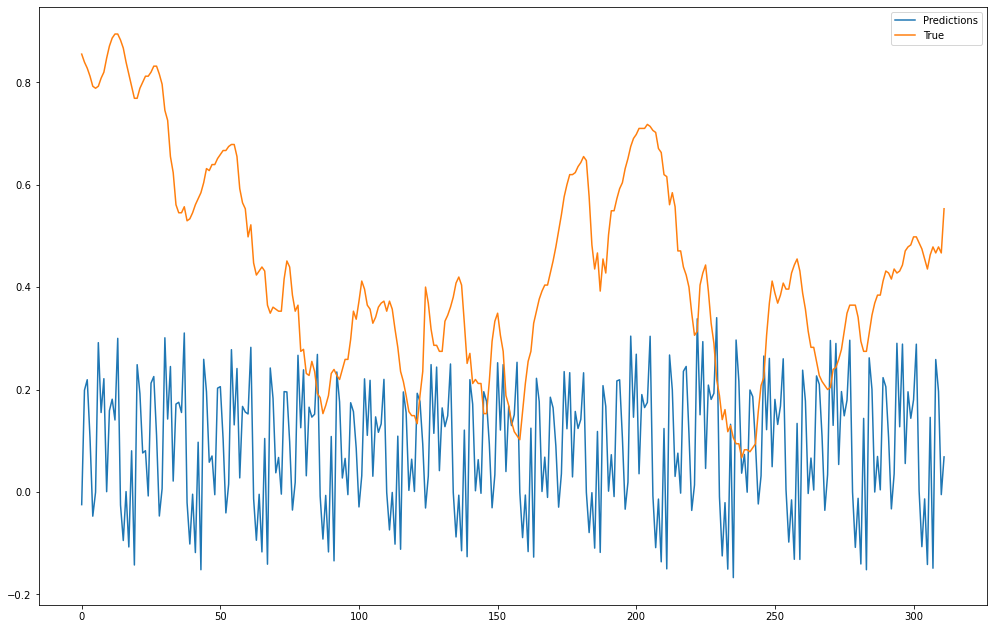

In [40]:
import matplotlib.pyplot as plt
predictions = model.predict(test_X,verbose=0)
nums_preds = []
nums_real = []
index = 0
# Käydään toistorakenteessa läpi ennustukset
for x in range(len(predictions) // len(predictions[0])):
    for num in predictions[index]:
        nums_preds.append(num)
    for num in test_y[index]:
        nums_real.append(num)
    # Siirrytään 24 tuntia eteenpäin, kun sekvenssi oikeista arvoista ja ennustetuista arvoista on lisätty listaan
    index += len(predictions[index]) - 1
fig, ax = plt.subplots(figsize=(17,11))
ax.plot(nums_preds,label='Predictions')
ax.plot(nums_real,label='True')
ax.legend()
plt.show()

### Aja "Tehtävän vastaukset" solu

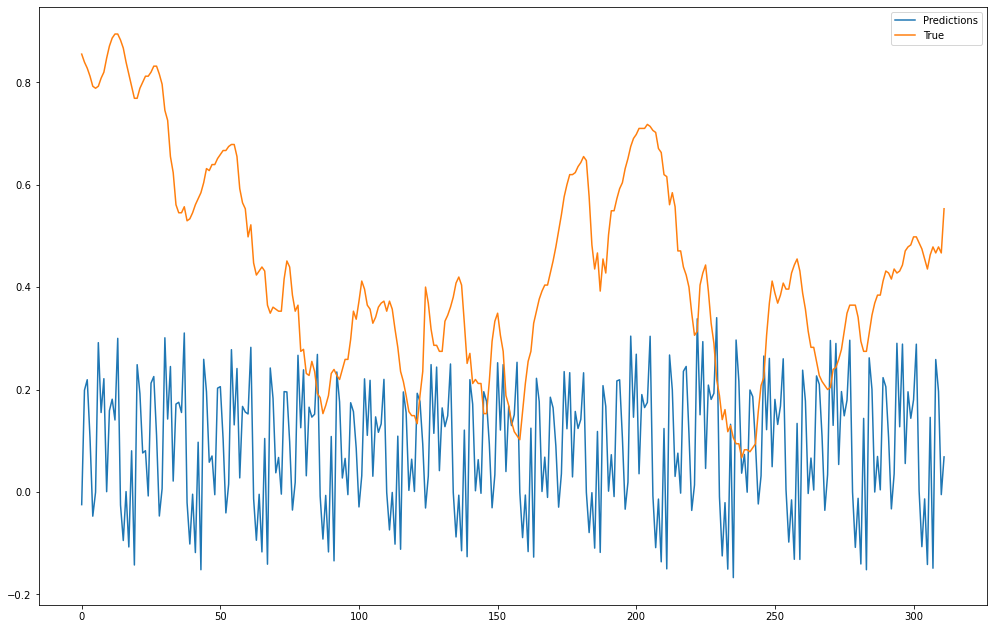

In [41]:
# Tehtävän vastaukset.  Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Luo tarvittavat osat viivakaavioon fig - muuttujaan matplotlib - kirjastoa käyttäen. Tuloksena pitäisi olla viivakaavio, jossa on piirrettynä oikeat arvot ja neuroverkon ennustukset.
fig

# Tehtävä 3.
### Aihe: Autoenkooderit - Poikkeaman tunnistus 
2,5 pistettä

Credit card fraud - datasetissä on 28 anonymisoitua muuttujaa, jonka perusteella voi arvioida, onko luottokorttitapahtuma aito vai huijaus, joka on myös datasetissä jokaiselle tapahtumalle luokiteltu.

1. Lataa luottokorttihuijaus datasetti Kagglesta https://www.kaggle.com/mlg-ulb/creditcardfraud
2. Jaa datasetti koulutus- ja testidatasettiin
3. Luo autoenkooderimalli, jossa sisääntulevasta luottokorttitapahtumatiedoista tiivistetään pienin mahdollinen esitys, ja esitys luodaan takaisin luottokorttitapahtumatiedoksi
4. Määritä koulutusdatan avulla raja-arvo virheelle, minkä ylittävät tapahtumat luokitellaan luottokorttihuijauksiksi
5. Tutki numeerisesti tai visuaalisesti, kuinka hyvin raja-arvolla tunnistetaan poikkeamat testidatasetistä

Vinkkejä:
* Datasetissä on erittäin vähän poikkeamia oikeisiin tapahtumiin verrattuna. Käytä train_test_split funktion 'stratify' parametriä, jotta saat koulutus- ja testidatasetteihin oikean suhteen oikeita ja poikkeavia tapahtumia.
* Viimeisessä kohdassa voit joko visualisoida poikkeamia Autoenkooderi - materiaalien tapaan kuvaajalla tai luomalla [sekaannusmatriisin](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) autoenkooderin ennusteista.

In [1]:
# Tehtävän toteutus
import pandas as pd

### Lataa luottokorttihuijaus datasetti Kagglesta https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
df_luottokorttihuijaus = pd.read_csv('data/creditcard.csv', sep=',')

In [3]:
df_luottokorttihuijaus.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Jaa datasetti koulutus- ja testidatasettiin

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_luottokorttihuijaus.drop('Class',axis=1).values, df_luottokorttihuijaus['Class'].values, train_size=0.8, stratify=df_luottokorttihuijaus['Class'])

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_X = scaler.fit_transform(X_train)
test_X = scaler.transform(X_test)
# valitaan 50 muokkaamatonta arvoa
test_X_normal = test_X[:50]
# muokataan loput arvot kertomalla ne kymmenellä
test_X_modified = test_X[50:] * 10
test_X_modified = scaler.transform(test_X_modified)

### Luo autoenkooderimalli, jossa sisääntulevasta luottokorttitapahtumatiedoista tiivistetään pienin mahdollinen esitys, ja esitys luodaan takaisin luottokorttitapahtumatiedoksi

In [6]:
import tensorflow as tf
features = X_train.shape[1] # Kuinka monta saraketta datasetissä
input_layer = tf.keras.Input(shape=(features,))
encoder = tf.keras.layers.Dense(7,activation='relu')(input_layer) # Enkooderi, antaa ulos pienemmän esityksen syötteestä, eli vektori z aiemmassa kuvatussa pullonkaulassa
decoder = tf.keras.layers.Dense(features, activation='sigmoid')(encoder) # Dekooderi
autoencoder = tf.keras.Model(inputs=input_layer,
                             outputs=decoder)

In [7]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='mean_squared_error')
autoencoder.fit(X_train,X_train,epochs=10,batch_size=4)

C:\Users\Rixu\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
56962/56962 [==============================] - 96s 2ms/step - loss: 374842688.0000
Epoch 2/10
56962/56962 [==============================] - 126s 2ms/step - loss: 374842688.0000
Epoch 3/10
56962/56962 [==============================] - 130s 2ms/step - loss: 374842880.0000 1s
Epoch 4/10
56962/56962 [==============================] - 108s 2ms/step - loss: 374847040.0000
Epoch 5/10
56962/56962 [==============================] - 126s 2ms/step - loss: 374843424.0000
Epoch 6/10
56962/56962 [==============================] - 99s 2ms/step - loss: 374843072.0000
Epoch 7/10
56962/56962 [==============================] - 98s 2ms/step - loss: 374840864.0000
Epoch 8/10
56962/56962 [==============================] - 105s 2ms/step - loss: 374841280.0000 0s - loss: 3748038
Epoch 9/10
56962/56962 [==============================] - 181s 3ms/step - loss: 374844896.0000
Epoch 10/10
56962/56962 [==============================] - 180s 3ms/step - loss: 374841824.0000


In [8]:
normal_predictions = autoencoder.predict(test_X_normal[0:1])
modified_predictions = autoencoder.predict(test_X_modified[0:1])

### Määritä koulutusdatan avulla raja-arvo virheelle, minkä ylittävät tapahtumat luokitellaan luottokorttihuijauksiksi

In [9]:
import numpy as np
mse_normal = np.mean((test_X_normal[0:1] - normal_predictions)**2)
mse_normal

0.23631126788507378

In [10]:
mse_modified = np.mean((test_X_modified[0:1] - modified_predictions)**2)
mse_modified

0.4165173374258612

### Tutki numeerisesti tai visuaalisesti, kuinka hyvin raja-arvolla tunnistetaan poikkeamat testidatasetistä

In [23]:
c=np.where(y_test==0, "green", "red")
c

array(['green', 'green', 'green', ..., 'green', 'green', 'green'],
      dtype='<U5')

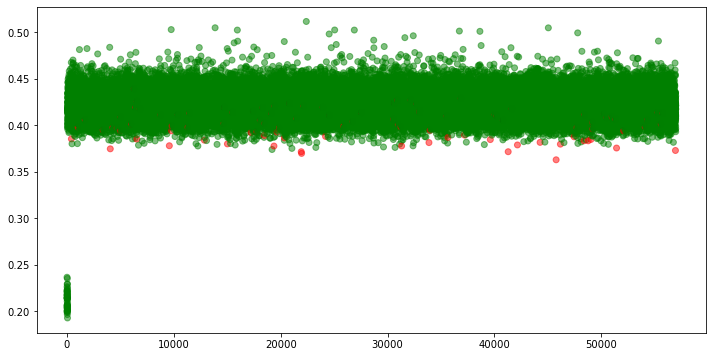

In [46]:
# Tehtävän vastaukset. Käytä visualisaatiota tai osoita numeerisesti, kuinka monta poikkeamaa neuroverkkomalli huomasi.
import matplotlib.pyplot as plt
normal_predictions = autoencoder.predict(test_X_normal)
mse_normal = np.mean((test_X_normal - normal_predictions)**2,axis=1)
modified_predictions = autoencoder.predict(test_X_modified)
mse_modified = np.mean((test_X_modified - modified_predictions)**2,axis=1)
predictions_mse = np.concatenate([mse_normal,mse_modified]) # Yhdistetään ennustukset yhteen taulukkoon kuvaajaa varten
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(range(len(predictions_mse)),predictions_mse, c=c, alpha=0.5)

# Tehtävä 4.
### Aihe: Autoenkooderit - Kohinan poisto kuvasta
2,5 pistettä

Alla on luotu MNIST datasetistä "korruptoitunut" versio, jossa kuviin on lisätty kohinaa. Luo autoenkooderi, jolle syötetään suttuinen numero ja joka luo kuvan uudestaan puhtaana numerona.

Todista autoenkooderin toiminta:
1. Piirrä Matplotlibillä testidatasetistä suttuinen kuva (esim. test_X_noisy[10])
2. Syötä suttuinen kuva autoenkooderille.
3. Piirrä autoenkooderin ulostulona antama kuva.
4. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Mieti, mikä muuttuja menee syötteenä autoenkooderiin ja mikä muuttuja on haluttu lopputulos?
    * Suttuinen kuva -> autoenkooderi -> Selkeä kuva
* Piirrät kuvat käyttäen matplotlib - kirjastoa
    * Autoenkooderi materiaaleissa esimerkki

In [67]:
# Ladataan tarvittavat kirjastot
import tensorflow as tf
import numpy as np
# Puhdas MNIST datasetti, josta otetaan kymmenesosa kuvista datasettiin
(train_X, _), (test_X, _) = tf.keras.datasets.mnist.load_data()
train_X, test_X = train_X[0:len(train_X) // 10], test_X[0:len(test_X) // 10]
train_X, test_X = train_X / 255.0, test_X / 255.0
train_X, test_X = train_X.reshape((train_X.shape[0],28,28,1)), test_X.reshape((test_X.shape[0],28,28,1))

# Luodaan suttuisia kuvia MNIST datasetistä laittamalla kuviin kohinaa
noise = np.random.normal(loc=0.5, scale=0.75, size=train_X.shape)
train_X_noisy = train_X + noise
noise = np.random.normal(loc=0.5, scale=0.75, size=test_X.shape)
test_X_noisy = test_X + noise
train_X_noisy = np.clip(train_X_noisy, 0., 1.) 
test_X_noisy = np.clip(test_X_noisy, 0., 1.)

In [68]:
# Tehtävän toteutus

### Piirrä Matplotlibillä testidatasetistä suttuinen kuva (esim. test_X_noisy[10])

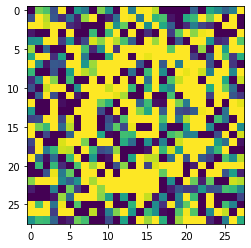

In [69]:
import matplotlib.pyplot as plt
test_img = test_X_noisy[10]
test_img = test_img.reshape(test_img.shape[0],test_img.shape[1])
plt.imshow(test_img)
plt.show()

### Syötä suttuinen kuva autoenkooderille.

In [70]:
enc_input = tf.keras.Input(shape=(28,28,1))
enc_conv1 = tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu')(enc_input)
enc_conv2 = tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),activation='relu')(enc_conv1)
enc_flatten = tf.keras.layers.Flatten()(enc_conv2)
enc_out = tf.keras.layers.Dense(64,activation='linear')(enc_flatten)
encoder = tf.keras.Model(inputs=enc_input,
                         outputs=enc_out,
                         name='Encoder')
encoder.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                147520    
Total params: 166,336
Trainable params: 166,336
Non-trainable params: 0
_________________________________________________________________


In [71]:
dec_input = tf.keras.Input(shape=(64,))
dec_dense1 = tf.keras.layers.Dense(7*7*64,activation='relu')(dec_input)
dec_reshape = tf.keras.layers.Reshape(target_shape=(7,7,64))(dec_dense1)
dec_convt1 = tf.keras.layers.Conv2DTranspose(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu')(dec_reshape)
dec_convt2 = tf.keras.layers.Conv2DTranspose(filters=32,kernel_size=3,strides=(2,2),padding='same',activation='relu')(dec_convt1)
dec_out = tf.keras.layers.Conv2DTranspose(filters=1,kernel_size=3,strides=(1,1),padding='same',activation="sigmoid")(dec_convt2)
decoder = tf.keras.Model(inputs=dec_input,
                         outputs=dec_out,
                         name='Decoder')
decoder.summary()

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 259,521
Trainable params: 259,521
Non-trainable params: 0
_____________________________________________________

In [72]:
autoencoder_input = tf.keras.Input(shape=(28,28,1),name='Autoencoder_input')
encoder_out = encoder(autoencoder_input)
decoder_out = decoder(encoder_out)
autoencoder = tf.keras.Model(inputs=autoencoder_input, 
                             outputs=decoder_out,
                             name='Autoencoder')
autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Autoencoder_input (InputLaye [(None, 28, 28, 1)]       0         
_________________________________________________________________
Encoder (Functional)         (None, 64)                166336    
_________________________________________________________________
Decoder (Functional)         (None, 28, 28, 1)         259521    
Total params: 425,857
Trainable params: 425,857
Non-trainable params: 0
_________________________________________________________________


In [73]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001),
                    loss = 'mean_squared_error')
autoencoder.fit(train_X,train_X,epochs=5,batch_size=16)

Epoch 1/5
375/375 [==============================] - 11s 28ms/step - loss: 0.0941 0s
Epoch 2/5
375/375 [==============================] - 12s 32ms/step - loss: 0.0580
Epoch 3/5
375/375 [==============================] - 9s 25ms/step - loss: 0.0298
Epoch 4/5
375/375 [==============================] - 8s 21ms/step - loss: 0.0189
Epoch 5/5
375/375 [==============================] - 8s 21ms/step - loss: 0.0145


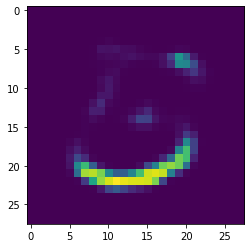

In [74]:
test_img = test_img.reshape(1,28,28,1)
prediction = autoencoder.predict(test_img)
prediction = prediction.reshape(prediction.shape[1],prediction.shape[2])
plt.imshow(prediction)
plt.show()

In [75]:
cleaned_img=prediction

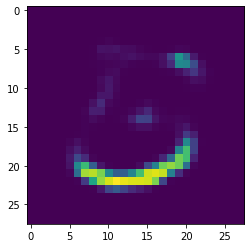

In [76]:
# Tehtävän vastaukset.  Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Syötä cleaned_img - muuttujaan autoenkooderin ulostulo. Muista muokata sitä ennen ulostulo takaisin 28x28 matriisiksi, jotta sen voi syöttää plt.imshow() funktiolle.
plt.imshow(cleaned_img)

# Extra Tehtävä
### Aihe: Twiitin klassifiointi - Positiivinen vai negatiivinen?
2,5 pistettä

Tämä on ylimääräinen tehtävä, jonka avulla voit saada muutaman lisäpisteen.

Lataa datasetti osoitteesta https://student.labranet.jamk.fi/~korpjo/files/Sentiment-Analysis-Dataset.zip. Datasetissä on twiittejä, jotka on leimattu positiiviseksi (1) tai negatiiviseksi (0) Sentiment - sarakkeessa.

Twiiteissä on paljon turhaa tavaraa, kuten linkkejä ja viittauksia muihin käyttäjiin @ - merkillä, jotka eivät auta tai haittaavat neuroverkkoja klassifioimaan twiittejä. Muokkaa datasettiä ja luo neuroverkkomalli, joka ennustaa, onko twiitti positiivinen vai negatiivinen. 

Jaa data koulutus- ja testidataan (80% koulutusdataa 20% testidataa jako) ja mittaa kuinka tarkka mallisi on testidatan avulla.

Vinkkejä:
* Tekstin esikäsittelyyn voi käyttää esim. TensorFlowin Tokenizer - luokkaa: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
* Viittauksia ja linkkejä ei välttämättä tarvitse poistaa, vaan ne voi korvata yleisesti jollakin merkkijonolla. Esim. "http://iltalehti.fi" -> "link_to_website" tai "@elonmusk" -> "reference_to_user"

In [ ]:
# Tehtävän toteutus

### Datan lataus

In [28]:
import pandas as pd

In [29]:
twiitit=pd.read_csv('data/Sentiment_Analysis_Dataset.csv', error_bad_lines=False)

b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


In [30]:
twiitit.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [31]:
twiitit.tail()

,ItemID,Sentiment,SentimentSource,SentimentText
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?"
1578611,1578627,0,Sentiment140,"Zzzzzzzzzzzzzzzzzzz, I wish"


### Datan puhdistus

In [32]:
import re
import nltk 
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","reference_to_user",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "website", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet
twiitit['SentimentText'] = twiitit['SentimentText'].map(lambda x: cleaner(x))
twiitit.to_csv('data/cleaned_sentiment_analysis_dataset.csv') #specify location

In [51]:
df=pd.read_csv('data/cleaned_sentiment_analysis_dataset.csv')

In [52]:
df.head()

,Unnamed: 0,ItemID,Sentiment,SentimentSource,SentimentText
0,0,1,0,Sentiment140,is so sad for my APL friend.............
1,1,2,0,Sentiment140,I missed the New Moon trailer...
2,2,3,1,Sentiment140,omg its already 7:30 :O
3,3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I've been at ...
4,4,5,0,Sentiment140,i think mi bf is cheating on me!!! T T


In [53]:
df.tail()

,Unnamed: 0,ItemID,Sentiment,SentimentSource,SentimentText
1578607,1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!
1578608,1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people"
1578609,1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.
1578610,1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?"
1578611,1578611,1578627,0,Sentiment140,"Zzzzzzzzzzzzzzzzzzz, I wish"


In [54]:
(df['SentimentText'][2])

'omg its already 7:30 :O'

In [55]:
(df['SentimentText'][4])

'i think mi bf is cheating on me!!! T T'

### Jaa data koulutus- ja testidataan (80% koulutusdataa 20% testidataa jako) ja mittaa kuinka tarkka mallisi on testidatan avulla

In [56]:
from sklearn.model_selection import train_test_split
y=df.pop('Sentiment')
X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
X_train

,Unnamed: 0,ItemID,SentimentSource,SentimentText
243260,243260,243273,Sentiment140,sadness.... Time to distract myself.
702928,702928,702944,Sentiment140,reference to user That's what I was about to d...
388929,388929,388942,Sentiment140,reference to user why am I not supposed to agree?
882477,882477,882493,Sentiment140,I hope that movie isn't a waist of time and mo...
456946,456946,456959,Sentiment140,reference to user yey!!! can I have cake?
...,...,...,...,...
455458,455458,455471,Sentiment140,reference to user At least it looks like a law...
649413,649413,649429,Sentiment140,Electronics against me again... Lab comp sin a...
995521,995521,995537,Sentiment140,Just got home. Work tomorrow morning.
381013,381013,381026,Sentiment140,reference to user thanks for the support!


In [60]:
# Tokenizer luonti. Parametriin 'num_words' määritellään sanakirjan koko.
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=120)
# Sanakirjan luonti
tokenizer.fit_on_texts(X_train["SentimentText"].tolist())

# Tekstit sekvensseiksi
text_train_seq = tokenizer.texts_to_sequences(X_train["SentimentText"].tolist())
text_test_seq = tokenizer.texts_to_sequences(X_test["SentimentText"].tolist())
text_train_seq

[[52, 1],
 [3,
  1,
  2,
  57,
  4,
  27,
  61,
  1,
  42,
  86,
  11,
  20,
  29,
  4,
  70,
  28,
  103,
  1,
  16,
  66,
  11],
 [3, 1, 2, 114, 64, 4, 26, 1],
 [4, 98, 19, 6, 14, 52, 8, 4, 40, 109, 70, 13, 11, 1, 34, 15],
 [3, 1, 2, 68, 4, 18],
 [3, 1, 2, 9, 58, 24, 13, 7, 14, 73, 92, 5, 90, 14, 13, 6],
 [102, 1, 36, 13, 7, 12, 21, 11],
 [3, 1, 2, 55, 38, 17],
 [111, 16],
 [3, 1, 2, 39, 88, 56, 88, 22, 11],
 [3, 1, 2, 64, 4, 106, 42, 9, 81, 4, 64, 6],
 [4, 63, 47, 1, 111, 10, 17, 96, 111, 17, 89],
 [3, 1, 2, 4],
 [99, 5],
 [57, 9, 16],
 [3, 1, 1, 2, 57, 52, 9, 50, 44, 91, 33],
 [7],
 [3, 1, 2, 19, 9, 15, 28, 95, 15, 37, 61, 1, 5],
 [3, 1, 2, 4, 94, 1, 5, 85, 72, 26, 12],
 [71, 15, 7, 112, 20, 4, 1, 24, 54, 28, 15, 4, 11, 90],
 [7, 43, 26, 73, 4, 68, 118, 76, 39, 43],
 [3, 1, 2, 57, 61],
 [3, 1, 2, 9, 38, 4, 64, 14, 5, 9, 56, 14],
 [4, 93, 7],
 [3, 1, 2, 73, 9, 65, 80, 16, 1, 93, 46, 5, 7, 19, 58, 11, 1, 7],
 [28, 33],
 [78, 43],
 [10, 30, 13, 6],
 [100, 29, 4, 18, 6],
 [3, 1, 2, 54,

In [61]:
# Täytetään one-hot enkoodatut lauseet samanpituisiksi
padded_one_hot_sentences_train = tf.keras.preprocessing.sequence.pad_sequences(text_train_seq, maxlen=4, padding='post')
padded_one_hot_sentences_test = tf.keras.preprocessing.sequence.pad_sequences(text_test_seq, maxlen=4, padding='post')

padded_one_hot_sentences_train

array([[ 52,   1,   0,   0],
       [  1,  16,  66,  11],
       [ 64,   4,  26,   1],
       ...,
       [ 83,  49, 101, 102],
       [  2,  82,  13,   5],
       [  9,  17,  39,  19]])

In [62]:
len(padded_one_hot_sentences_train[0])

4

In [63]:
input_layer = tf.keras.Input(shape=(4,))
emb = tf.keras.layers.Embedding(20000,2,
                                input_length=len(padded_one_hot_sentences_train[0]))(input_layer)
lstm = tf.keras.layers.LSTM(64,return_sequences=True,dropout=0.1)(emb)
do = tf.keras.layers.Dropout(0.5)(lstm)
flat = tf.keras.layers.Flatten()(do)
dense = tf.keras.layers.Dense(32,activation='relu')(flat)
out = tf.keras.layers.Dense(1,activation='sigmoid')(dense)
model = tf.keras.Model(inputs=input_layer,
                    outputs=out)

In [64]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
model.fit(padded_one_hot_sentences_train,
          y_train,
          validation_data=(padded_one_hot_sentences_test,y_test),
          epochs=10)

C:\Users\Rixu\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
39466/39466 [==============================] - 377s 9ms/step - loss: 0.6235 - accuracy: 0.6476 - val_loss: 0.6136 - val_accuracy: 0.6594
Epoch 2/10
39466/39466 [==============================] - 270s 7ms/step - loss: 0.6191 - accuracy: 0.6529 - val_loss: 0.6132 - val_accuracy: 0.6587
Epoch 3/10
39466/39466 [==============================] - 302s 8ms/step - loss: 0.6183 - accuracy: 0.6533 - val_loss: 0.6120 - val_accuracy: 0.6591
Epoch 4/10
39466/39466 [==============================] - 287s 7ms/step - loss: 0.6178 - accuracy: 0.6532 - val_loss: 0.6114 - val_accuracy: 0.6594
Epoch 5/10
39466/39466 [==============================] - 283s 7ms/step - loss: 0.6172 - accuracy: 0.6532 - val_loss: 0.6110 - val_accuracy: 0.6587
Epoch 6/10
39466/39466 [==============================] - 276s 7ms/step - loss: 0.6168 - accuracy: 0.6534 - val_loss: 0.6101 - val_accuracy: 0.6599
Epoch 7/10
39466/39466 [==============================] - 216s 5ms/step - loss: 0.6164 - accuracy: 0.6536 - val_

In [65]:
results = model.evaluate(padded_one_hot_sentences_test,y_test,verbose=0)

In [66]:
print(f"Test Loss:{results[0]} Test Accuracy:{results[1]*100}%")

Test Loss:0.6100292801856995 Test Accuracy:65.98537564277649%
